In [1]:
# pandas for data manipulation  
# numpy for numerical computations  
# matplotlib for visualization  
# seaborn for data visualization  
# warnings to suppress unwanted warning messages  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
# loading the data
data = load_breast_cancer()

In [4]:
# converting into a dataframe
df = pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
# getting target values in y column
df['y']=data.target

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**StandardScaler**

StandardScaler() - <br>
It ensures all data follow same scale.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
# applying standard scaling to all columns except the last one and storing the result in a new dataframe
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

In [10]:
df_scaled.shape

(569, 30)

Data Distribution using kde plot

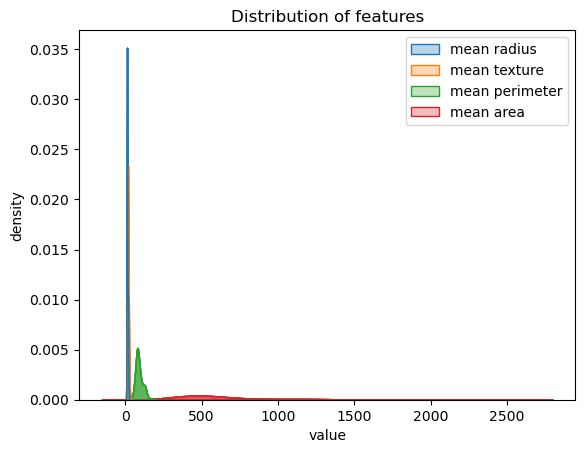

In [11]:
# plotting kdeplot 
features = ['mean radius','mean texture','mean perimeter','mean area']
for i in features:
    sns.kdeplot(df[features],label=features,fill=True,alpha=0.3)

plt.xlabel('value')
plt.ylabel('density')
plt.title('Distribution of features')
plt.show()

Checking data is balanced or imbalanced

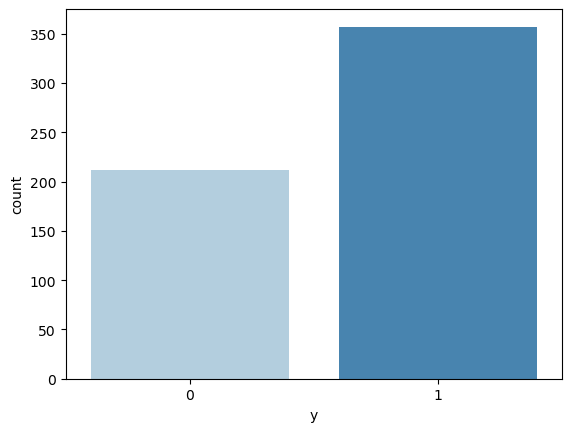

In [12]:
sns.countplot(df,x='y',palette='Blues')
plt.show()

In [13]:
print(df['y'].value_counts(normalize=True) * 100)

y
1    62.741652
0    37.258348
Name: proportion, dtype: float64


> By observing the percentage and countplot the data is imbalanced 

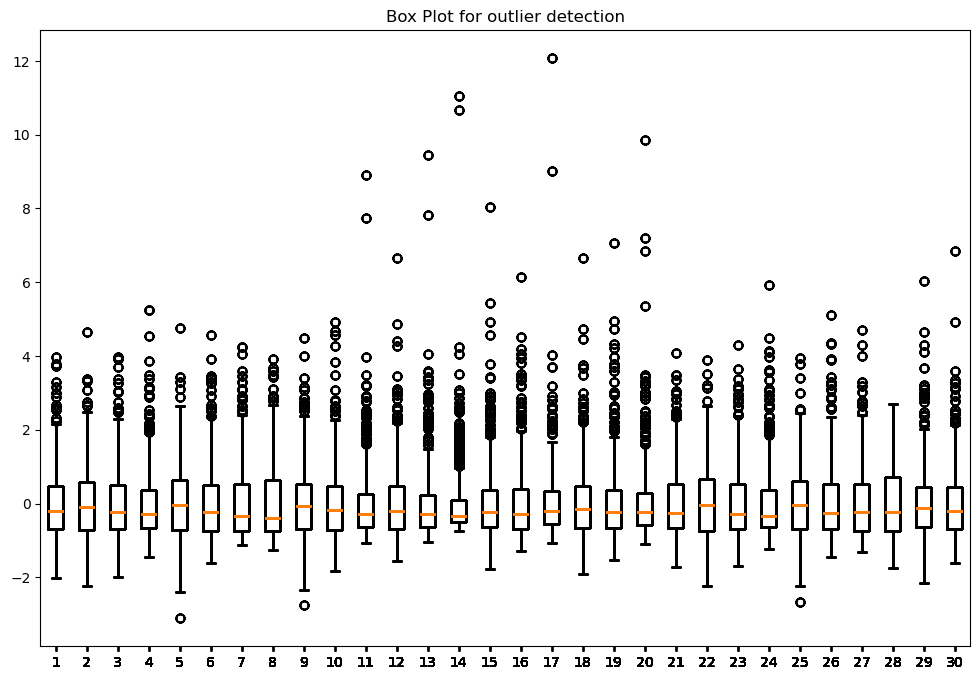

In [14]:
# checking is data contains outliers
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
plt.figure(figsize=(12,8))
for i in features:
    plt.boxplot(df_scaled[features])
plt.title('Box Plot for outlier detection')
plt.show()

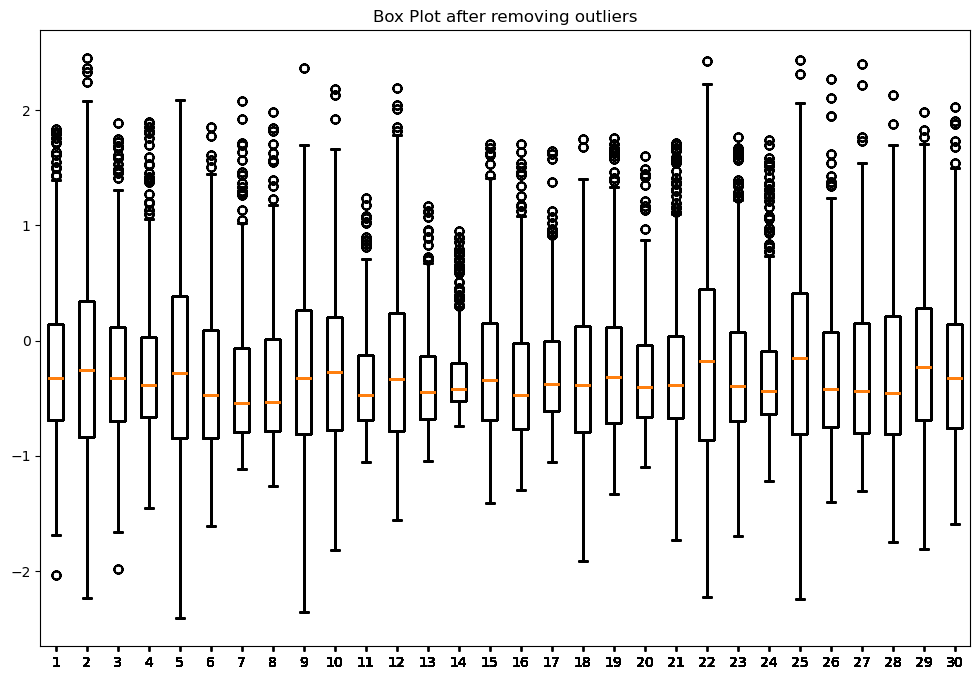

In [15]:
# removing outliers from data using Interquartile Range
def remove_outlier(df_scaled):
    Q1 = df_scaled.quantile(0.25)
    Q3 = df_scaled.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_scaled[(df_scaled >= lower_bound) & (df_scaled <= upper_bound)].dropna()

filtered_data = remove_outlier(df_scaled)

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
plt.figure(figsize=(12,8))
for i in features:
    plt.boxplot(filtered_data[features])
plt.title('Box Plot after removing outliers')
plt.show()

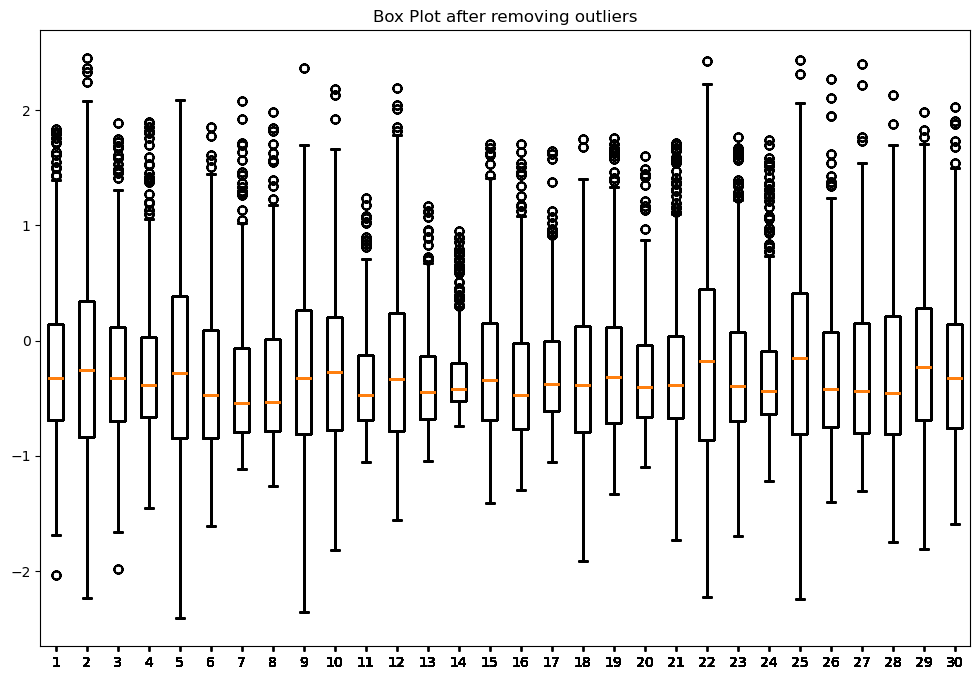

In [16]:
# checking by decreasing lower_bound and upper_bound value from 1.5 to 1.0 to check it will cover the outliers
def remove_outlier(df_scaled,y):
    Q1 = df_scaled.quantile(0.25)
    Q3 = df_scaled.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.0 * IQR  
    upper_bound = Q3 + 1.0 * IQR
    mask = (df_scaled >= lower_bound) & (df_scaled <= upper_bound)
    filtered_df = df_scaled[mask].dropna()
    filtered_y = y.loc[filtered_df.index]
    return filtered_df,filtered_y

X_filtered, y_filtered = remove_outlier(df_scaled,df['y'])

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
plt.figure(figsize=(12,8))
for i in features:
    plt.boxplot(filtered_data[features])
plt.title('Box Plot after removing outliers')
plt.show()

>i have checked my models accuracy after using ourliers removed data but instead of improving my models accuracy it decreased it that is why i am using with outliers data for my training model

In [17]:
# all columns are important
X = df_scaled

In [18]:
y = df['y']

**Logistic Regression**

In [19]:
# used LogisticRegression because output is either yes or no type
from sklearn.linear_model import LogisticRegression

In [20]:
logistic_reg = LogisticRegression()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# dividing data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X.shape

(569, 30)

In [24]:
y.shape

(569,)

In [25]:
##  Used GridSearchCV because to find the best hyperparameter
# to avoid overfitting penalty parameter is used - l1 - lasso, l2 -ridge, elasticnet - l1+l2
# C parameter is used to define the streangth of regularization 
# why regularization is done because the model should perform well on unseen data
# max_iter - maximum no of iteration the model will perform
# to minimize cost function solver parameter is used 
# cost function tells us if the models prediction match the target value
# saga support all of the defined penalties so that saga solver is used 
from sklearn.model_selection import GridSearchCV
parameters={
    'penalty':['l1','l2','elasticnet'],
    'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80],
    'max_iter':[100,200,300],
    'solver': ['saga']
}

In [26]:
# parameters which we defined are initialized in gridsearchcv we have passed here logistic model , parameters,scoring for performance matrics 
# cv=5 is cross validation it will divide data into 5 parts and 4 parts will be used as training and 1 part as testing
# it will repeat for 5 times 
grid_cv=GridSearchCV(logistic_reg,param_grid=parameters,scoring='accuracy',cv=5)

In [27]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                               60, 70, 80],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             scoring='accuracy')

In [28]:
# to know which are the best parameters 
best_params=grid_cv.best_params_

In [29]:
# to know the score of the model
print(grid_cv.best_score_)

0.9780219780219781


In [30]:
logistic_model = LogisticRegression(**best_params)

In [31]:
logistic_model.fit(X_train,y_train)

LogisticRegression(C=2, solver='saga')

In [32]:
# to make prediction on test data
y_pred=logistic_model.predict(X_test)
# applying the sigmoid function to convert raw predictions into probabilities 
y_pred_prob = 1 / (1 + np.exp(-y_pred))  
y_pred_prob = [1 if prob > 0.5 else 0 for prob in y_pred_prob]  # convert to binary

In [33]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score,roc_curve,auc,roc_auc_score

In [34]:
# to check model's accuracy
train_accuracy = logistic_model.score(X_train,y_train)
test_accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
print('Training Accuracy : ',train_accuracy)
print('Testing Accuracy : ',test_accuracy)
print('F1-score : ',f1)
print('Recall score : ',recall)
print('Precision : ',precision)
print('AUC score : ', auc_score)

Training Accuracy :  0.9868131868131869
Testing Accuracy :  0.9912280701754386
F1-score :  0.993006993006993
Recall score :  1.0
Precision :  0.9861111111111112
AUC score :  0.9883720930232558


In [35]:
# precision - how many predicted values are correct
# recall - how many actual values are correct
# f1-score - balance between both of them
# support - no of occurance in y_test
# used this because it calculate all precision, recall and f1-score
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.99      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**_ROC ()Reciever operating characteristics AND AUC (Area Under the Curve)_**

It is used to evaluate the models performance <br>
The ROC curve is a plot of the True Positive Rate against the False Positive Rate at different classification thresholds.<br>
AUC measures the area under the ROC curve, summarizing its overall performance.

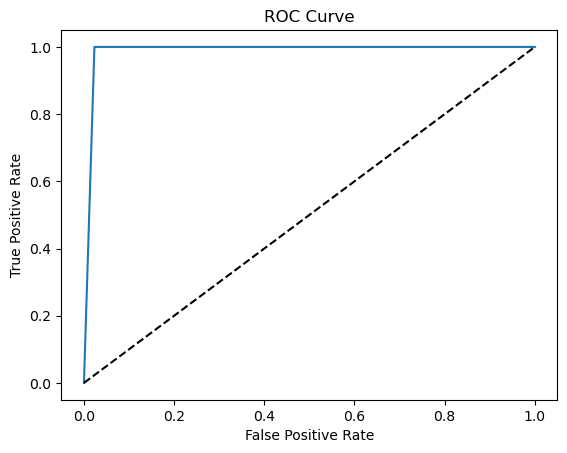

In [36]:
# calculating the false positive rate, true positive rate, and threshold values
false_positive_rate , true_positive_rate, threshold = roc_curve(y_test,y_pred_prob)
# computing the area under the roc curve
auc_score = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate,true_positive_rate,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

> Blue line curve is indicating that model's performance is best because it is near to 1 <br>
Black dash line is indicating the AUC score is near to 1 that means the models performance is excellent 

In [37]:
# i have select few features to plot them because if i use all features it is not appropriate plot
selected_features=['mean radius','mean texture','mean perimeter','mean area','mean smoothness']

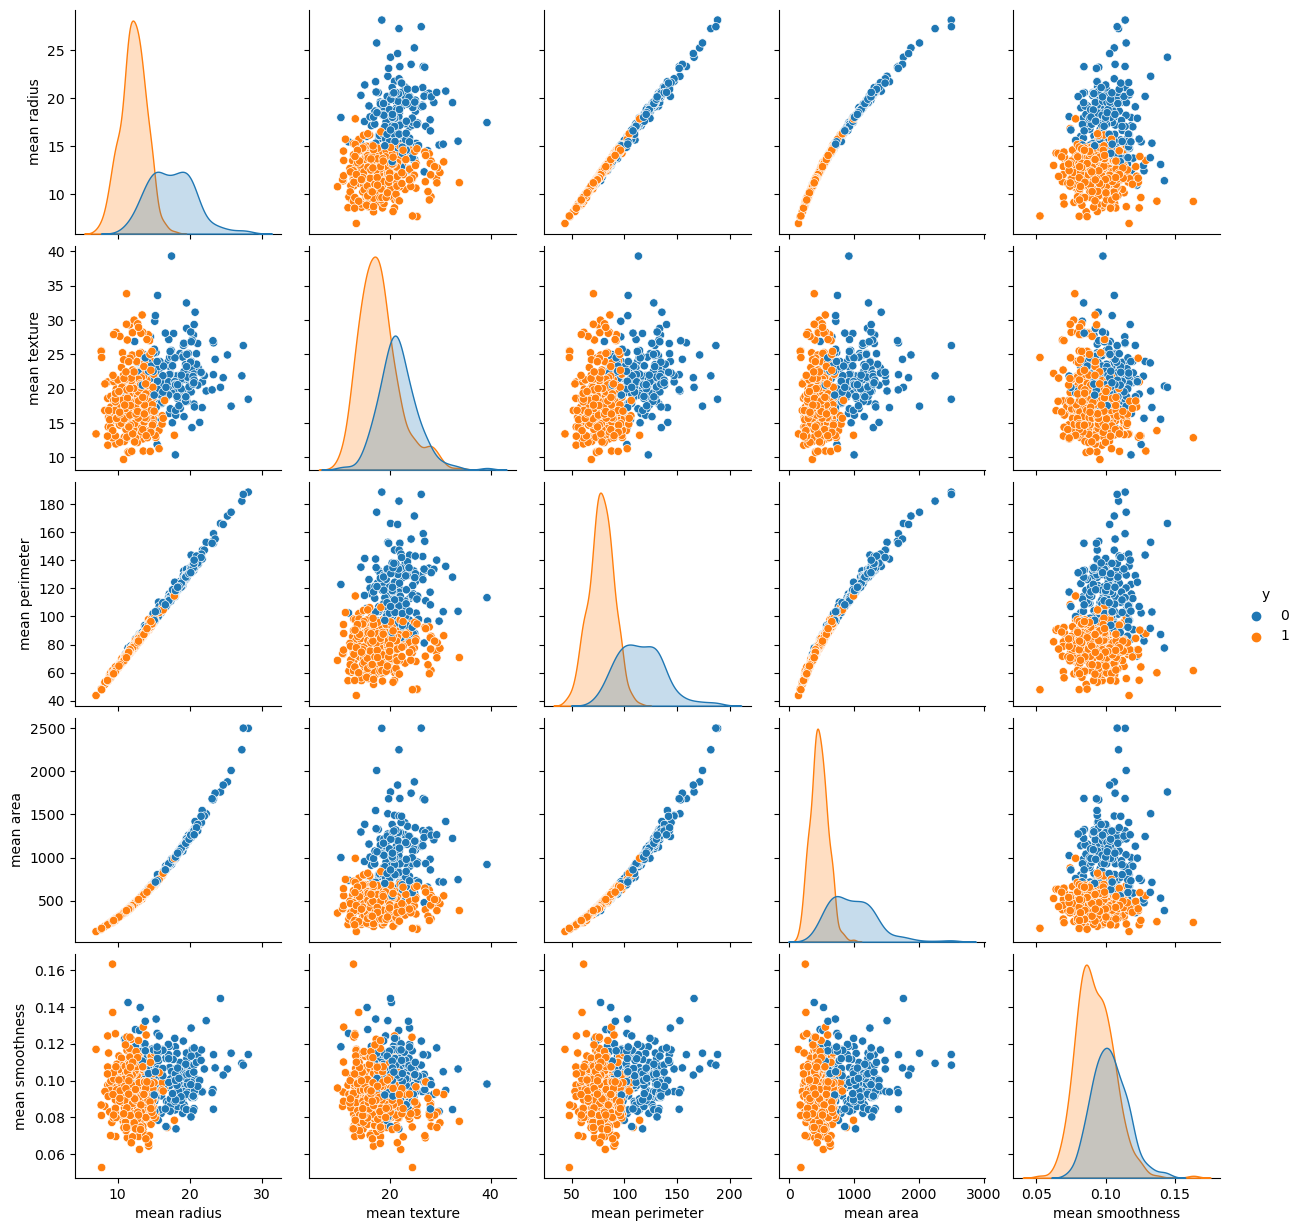

In [38]:
sns.pairplot(df[selected_features +['y']],hue='y',diag_kind='kde')

**XGBoost**

In [39]:
import xgboost as xgb

In [40]:
xgb_model = xgb.XGBClassifier(
    # using tree-based learning
    booster = 'gbtree',
    # step size for weight updates
    learning_rate = 0.05, 
    # maximum depth of trees
    max_depth = 4,
    # minimum sum of instance weights in a child
    min_child_weight = 2,
    # minimum loss reduction required to split a node
    gamma = 2,
    # fraction of training samples used for each tree
    subsample = 0.8,
    # fraction of features used for each tree
    colsample_bytree = 0.8,
    # total number of trees 
    n_estimators = 200,
    # target variable is binary
    objective='binary:logistic',
    # using auc as the evaluation metric
    eval_metric = 'auc',
    random_state =42
)

In [41]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [42]:
y_pred = xgb_model.predict(X_test)

In [43]:
# predict probabilities
y_pred_prob = xgb_model.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob > 0.5).astype(int)

In [44]:
from sklearn.metrics import roc_auc_score
# to check model's accuracy
train_accuracy = xgb_model.score(X_train,y_train)
test_accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
print('Training Accuracy : ',train_accuracy)
print('Testing Accuracy : ',test_accuracy)
print('F1-score : ',f1)
print('Recall score : ',recall)
print('Precision : ',precision)
print('AUC score : ',auc_score)

Training Accuracy :  0.9934065934065934
Testing Accuracy :  0.9649122807017544
F1-score :  0.9722222222222222
Recall score :  0.9859154929577465
Precision :  0.958904109589041
AUC score :  0.9921388797903702


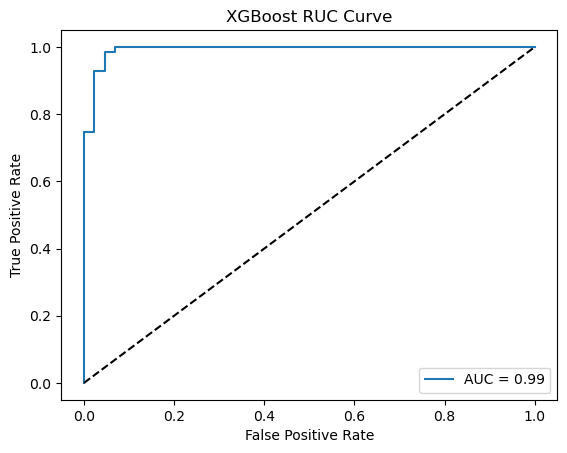

In [45]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred_prob)
auc_score = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate,true_positive_rate,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost RUC Curve')
plt.legend()
plt.show()

> Blue line shows how well the model separates two classes <br>
And it is closer to the top-left which means model is performing better <br>
ROC curve (blue line) is above the dashed line which means model is better performing <br>
**Note :** if ROC curve close to dashed line it means model has poor performance.

**Support Vector Machine**

In [46]:
from sklearn.svm import SVC

In [47]:
svm = SVC()

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'C' : [1,2,3,4,5,6,7,8,9,10,20],
    'kernel': ['poly','rbf','sigmoid'],
    'gamma' : ['scale','auto']
}

In [50]:
grid = GridSearchCV(svm,param_grid,scoring='accuracy',cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [51]:
best_params = grid.best_params_

In [52]:
svm = SVC(probability=True, **best_params)

In [53]:
svm.fit(X_train,y_train)

SVC(C=3, gamma='auto', probability=True)

In [54]:
y_pred = svm.predict(X_test)

In [55]:
# predict probability
y_pred_prob = svm.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob > 0.5).astype(int)

In [56]:
# to check model's accuracy
train_accuracy = logistic_model.score(X_train,y_train)
test_accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
print('Training Accuracy : ',train_accuracy)
print('Testing Accuracy : ',test_accuracy)
print('F1-score : ',f1)
print('Recall score : ',recall)
print('Precision : ',precision)
print('AUC score : ',auc_score)

Training Accuracy :  0.9868131868131869
Testing Accuracy :  0.9824561403508771
F1-score :  0.9861111111111112
Recall score :  1.0
Precision :  0.9726027397260274
AUC score :  0.996069439895185


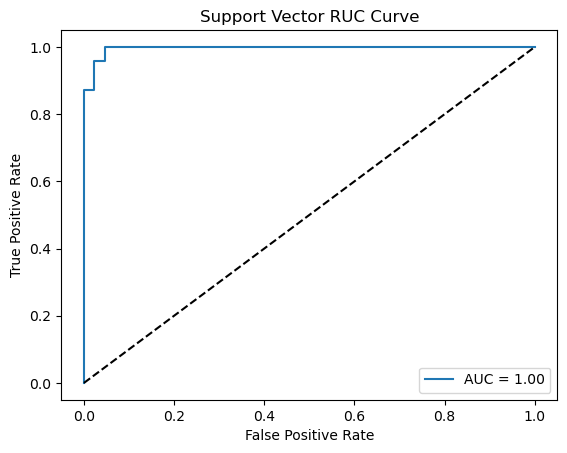

In [57]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred_prob)
auc_score = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate,true_positive_rate,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector RUC Curve')
plt.legend()
plt.show()

**Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
tree = DecisionTreeClassifier()

In [60]:
# hyperparameter tunning
param_grid = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [61]:
grid = GridSearchCV(tree,param_grid,cv=5,scoring='accuracy')

In [62]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [63]:
best_params = grid.best_params_

In [64]:
tree = DecisionTreeClassifier(**best_params)

In [65]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [66]:
y_pred = tree.predict(X_test)

In [67]:
y_pred_prob = tree.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob > 0.5).astype(int)

In [68]:
# to check model's accuracy
train_accuracy = logistic_model.score(X_train,y_train)
test_accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
print('Training Accuracy : ',train_accuracy)
print('Testing Accuracy : ',test_accuracy)
print('F1-score : ',f1)
print('Recall score : ',recall)
print('Precision : ',precision)
print('AUC score : ',auc_score)

Training Accuracy :  0.9868131868131869
Testing Accuracy :  0.956140350877193
F1-score :  0.9645390070921985
Recall score :  0.9577464788732394
Precision :  0.9714285714285714
AUC score :  0.9410415984277759


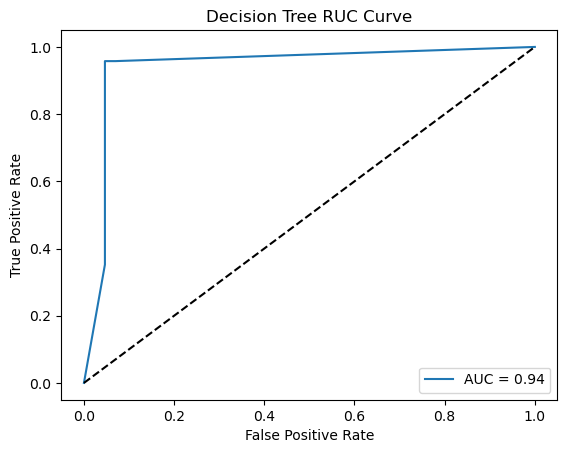

In [69]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred_prob)
auc_score = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate,true_positive_rate,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree RUC Curve')
plt.legend()
plt.show()

**Random Forest**

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier()

In [72]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [73]:
grid = GridSearchCV(rfc,param_grid,cv=5,scoring='accuracy')

In [74]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             scoring='accuracy')

In [75]:
best_params = grid.best_params_

In [76]:
rfc = RandomForestClassifier(**best_params)

In [77]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, max_features='log2')

In [78]:
y_pred = rfc.predict(X_test)

In [79]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob > 0.5).astype(int)

In [80]:
# to check model's accuracy
train_accuracy = rfc.score(X_train,y_train)
test_accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
print('Training Accuracy : ',train_accuracy)
print('Testing Accuracy : ',test_accuracy)
print('F1-score : ',f1)
print('Recall score : ',recall)
print('Precision : ',precision)
print('AUC score : ',auc_score)

Training Accuracy :  1.0
Testing Accuracy :  0.9649122807017544
F1-score :  0.9722222222222222
Recall score :  0.9859154929577465
Precision :  0.958904109589041
AUC score :  0.9970520799213888


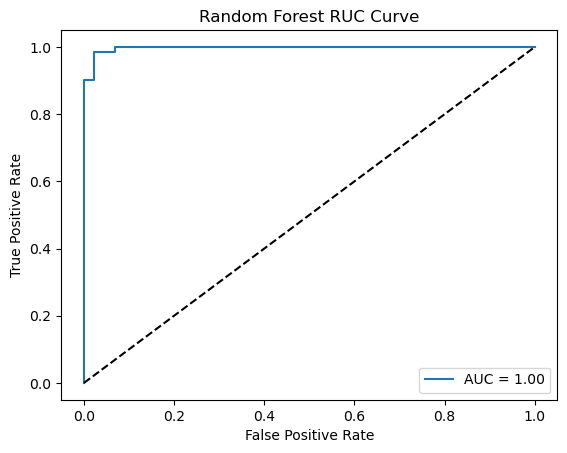

In [81]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred_prob)
auc_score = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate,true_positive_rate,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest RUC Curve')
plt.legend()
plt.show()

**K-nearest neighbor**

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier()

In [84]:
param_grid = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9],
    'weights':['uniform', 'distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

In [85]:
grid = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')

In [86]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [87]:
best_params = grid.best_params_

In [88]:
knn = KNeighborsClassifier(**best_params)

In [89]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [90]:
y_pred = knn.predict(X_test)

In [91]:
y_pred_prob = knn.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob > 0.5).astype(int)

In [92]:
# to check model's accuracy
train_accuracy = rfc.score(X_train,y_train)
test_accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
print('Training Accuracy : ',train_accuracy)
print('Testing Accuracy : ',test_accuracy)
print('F1-score : ',f1)
print('Recall score : ',recall)
print('Precision : ',precision)
print('AUC score : ',auc_score)

Training Accuracy :  1.0
Testing Accuracy :  0.956140350877193
F1-score :  0.9645390070921985
Recall score :  0.9577464788732394
Precision :  0.9714285714285714
AUC score :  0.9811660661644285


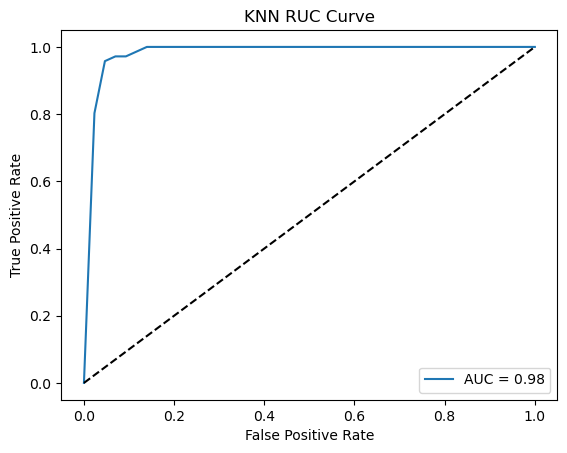

In [93]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred_prob)
auc_score = auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate,true_positive_rate,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN RUC Curve')
plt.legend()
plt.show()

**Comparision between all models**

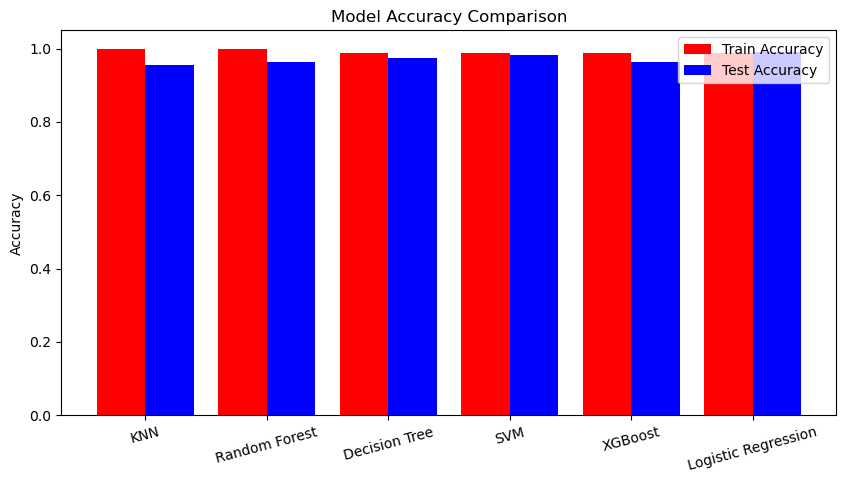

In [94]:
import numpy as np

models = ["KNN", "Random Forest", "Decision Tree", "SVM", "XGBoost", "Logistic Regression"]
train_acc = [1.0, 1.0, 0.9868, 0.9868, 0.9868, 0.9868]
test_acc = [0.9561, 0.9649, 0.9737, 0.9825, 0.9649, 0.9912]

x = np.arange(len(models))
plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, train_acc, 0.4, label="Train Accuracy", color='red')
plt.bar(x + 0.2, test_acc, 0.4, label="Test Accuracy", color='blue')

plt.xticks(x, models, rotation=15)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.show()

**Precision, Recall and f1-score comparision**

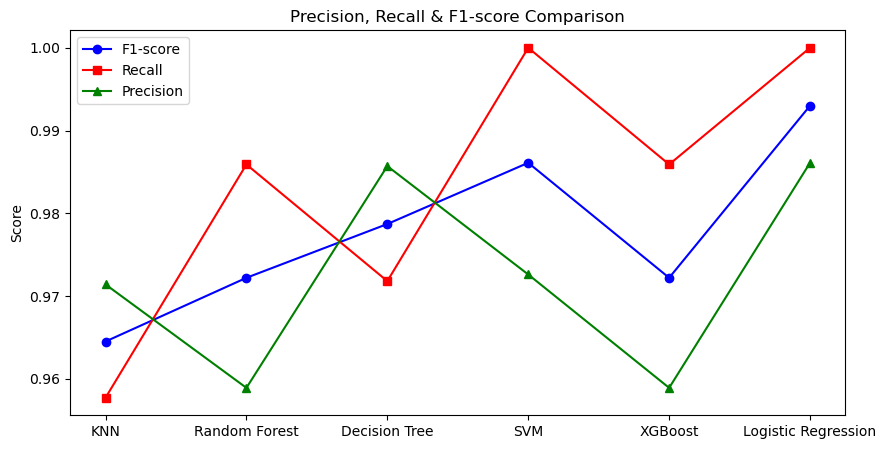

In [95]:
f1_scores = [0.9645, 0.9722, 0.9787, 0.9861, 0.9722, 0.9930]
recall_scores = [0.9577, 0.9859, 0.9718, 1.0, 0.9859, 1.0]
precision_scores = [0.9714, 0.9589, 0.9857, 0.9726, 0.9589, 0.9861]

plt.figure(figsize=(10, 5))
plt.plot(models, f1_scores, marker='o', label="F1-score", color='blue')
plt.plot(models, recall_scores, marker='s', label="Recall", color='red')
plt.plot(models, precision_scores, marker='^', label="Precision", color='green')

plt.ylabel("Score")
plt.title("Precision, Recall & F1-score Comparison")
plt.legend()
plt.show()

> **Evaluating Best Model**
> > By observing training accuracy, testing accuracy , F1-score, Precision, Recall scores Logistic Regression is best for the predictions.<br>
It is giving us high precision, f1, recall scores among all the models.